In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain langchain_community tiktoken langchain-nomic "nomic[local]" langchain-ollama scikit-learn langgraph tavily-python bs4

#What it does:

#Magic command:
#%%capture --no-stderr is a Jupyter Notebook cell magic that hides any output (including error messages) from the cell. This keeps your notebook neat while the command runs.

#Package installation:
#%pip install --quiet -U ... installs and upgrades (with -U) a list of Python libraries quietly (i.e., with minimal output).

#The packages being installed:

#langchain: A library to help you work with language models.
#langchain_community: Community contributions and extensions for LangChain.
#tiktoken: A fast tokenizer often used with language models.
#langchain-nomic: An integration package for using LangChain with Nomic.
#"nomic[local]": Nomic's package (with local options) for data analysis or visualization.
#langchain-ollama: A connector for integrating LangChain with the Ollama model.
#scikit-learn: A widely-used machine learning library.
#langgraph: Likely a tool for visualizing or managing language model workflows.
#tavily-python: A Python package (its specific role depends on your project needs).
#bs4: Beautiful Soup 4, a popular library for web scraping and parsing HTML/XML.

In [3]:
# This command installs the langchain-nomic package,
# which integrates LangChain with Nomic's local data tools
# for enhanced data visualization and analysis.
!pip install langchain-nomic

  Using cached langchain_nomic-0.1.4-py3-none-any.whl.metadata (1.6 kB)
  Using cached langchain_core-0.3.47-py3-none-any.whl.metadata (5.9 kB)
  Using cached nomic-3.4.1.tar.gz (49 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached langsmith-0.3.18-py3-none-any.whl.metadata (15 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached jsonlines-4.0.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached loguru-0.7.3-py3-none-any.whl.metadata (22 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached langchain_nomic-0.1.4-py3-none-any.whl (3.9 kB)
Using cached langchain_core-0.3.47-py3-none-any.whl (417 kB)
   ━━━━━━━━━━━━━━━━━━━━━

In [5]:
# This command installs the docx2txt package,
# which lets you extract text from Microsoft Word (.docx) files.
!pip install docx2txt


  Using cached docx2txt-0.8.tar.gz (2.8 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3992 sha256=c1141ea545868fa1490582917f0c2f9b3f0dc159a03fc374474a1c7c0b706bf3
  Stored in directory: /Users/andeysaikiran/Library/Caches/pip/wheels/6f/81/48/001bbc0109c15e18c009eee300022f42d1e070e54f1d00b218
Successfully built docx2txt


In [7]:
# This command uses the Ollama CLI to pull the 'llama3.2:3b-instruct-fp16' model.
# This model is a 3-billion parameter version fine-tuned for instruction-following,
# optimized with FP16 precision for efficient performance.
!ollama pull llama3.2:3b-instruct-fp16

pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling e2f46f5b501c... 100% ▕████████████████▏ 6.4 GB                         
pulling 966de95ca8a6... 100% ▕████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕████████████████▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕████████████████▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕████████████████▏   96 B                         
pulling 1bc315994ceb... 100% ▕████████████████▏  558 B                         
verifying sha256 digest 
writing manifest 
success 


In [8]:
### LLM Setup Using langchain_ollama

# Import the ChatOllama class from the langchain_ollama package.
from langchain_ollama import ChatOllama

# Define the local model identifier for the LLAMA3.2 3B instruct model with FP16 precision.
local_llm = "llama3.2:3b-instruct-fp16"

# Create an instance of ChatOllama with a temperature of 0 for deterministic responses.
llm = ChatOllama(model=local_llm, temperature=0)

# Create another instance that outputs responses in JSON format.
llm_json_mode = ChatOllama(model=local_llm, temperature=0, format="json")


In [9]:
import os
import getpass

# Define a function to set an environment variable if it isn't already set.
# It uses getpass to securely prompt the user for input without echoing the text.
def _set_env(var: str):
    # Check if the environment variable 'var' is not set.
    if not os.environ.get(var):
        # Prompt the user to input the value for the environment variable.
        os.environ[var] = getpass.getpass(f"{var}: ")

# Ensure that the TAVILY_API_KEY is set as an environment variable.
# If it's not already present, the user will be prompted to enter it.
_set_env("TAVILY_API_KEY")

# Set TOKENIZERS_PARALLELISM to "true" to enable parallel processing in tokenizers,
# which can speed up operations when using models or libraries that rely on it.
os.environ["TOKENIZERS_PARALLELISM"] = "true"


TAVILY_API_KEY: ········


In [10]:
# Ensure that the LANGSMITH_API_KEY environment variable is set.
# If it isn't already set, the user will be prompted to enter the key securely.
_set_env("LANGSMITH_API_KEY")

# Enable version 2 of LangChain tracing for enhanced debugging and performance monitoring.
os.environ["LANGCHAIN_TRACING_V2"] = "true"

# Set the LangChain project name to "local-llama32-rag" to group and organize your project traces.
os.environ["LANGCHAIN_PROJECT"] = "local-llama32-rag"

LANGSMITH_API_KEY: ········


In [12]:
import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import Docx2txtLoader, UnstructuredFileLoader, PyPDFLoader
from langchain_community.vectorstores import SKLearnVectorStore
from langchain_nomic.embeddings import NomicEmbeddings

# Directory containing your documents
directory = '/Users/andeysaikiran/Downloads/Starwars'

docs_word = []
docs_excel = []
docs_pdf = []  # New list to hold PDF documents

# Loop through all files in the directory and load them based on file extension.
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename.lower().endswith('.docx'):
        loader = Docx2txtLoader(filepath)
        docs = loader.load()
        docs_word.extend(docs)
    elif filename.lower().endswith('.xlsx'):
        # Use UnstructuredFileLoader for Excel files.
        loader = UnstructuredFileLoader(filepath)
        docs = loader.load()
        docs_excel.extend(docs)
    elif filename.lower().endswith('.pdf'):
        # Use PyPDFLoader for PDF files.
        loader = PyPDFLoader(filepath)
        docs = loader.load()
        docs_pdf.extend(docs)

# Combine all documents into a single list.
all_documents = docs_word + docs_excel + docs_pdf

# Split the documents into chunks.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=200
)
doc_splits = text_splitter.split_documents(all_documents)

# Create a vector store using NomicEmbeddings.
vectorstore = SKLearnVectorStore.from_documents(
    documents=doc_splits,
    embedding=NomicEmbeddings(model="nomic-embed-text-v1.5", inference_mode="local"),
)

# Create a retriever that returns the top 3 most relevant chunks.
retriever = vectorstore.as_retriever(k=3)

print(f"Loaded {len(docs_word)} Word documents, {len(docs_excel)} Excel documents, and {len(docs_pdf)} PDF documents.")
print(f"Split into {len(doc_splits)} document chunks.")


Embedding texts: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1761/1761 [04:40<00:00,  6.27inputs/s]

Loaded 0 Word documents, 0 Excel documents, and 1748 PDF documents.
Split into 1761 document chunks.


In [19]:
import json
from langchain_core.messages import HumanMessage, SystemMessage

# Updated Star Wars router instructions as defined above.
router_instructions = """You are an expert at routing a user's question to the appropriate data source: either a Star Wars vectorstore or a web search.

The vectorstore contains documents related to the Star Wars universe, including:
- Original movie scripts
- Character dialogues and descriptions
- Screenplay 

If the user's question specifically pertains to any aspect of Star Wars (such as movie details, character information, dialogue analysis, plot explanations, or screenplay), return 'vectorstore'. 
For all other topics—especially those that involve current events or non-Star Wars content—return 'websearch'.

Return a valid JSON object with a single key "datasource" whose value is either "vectorstore" or "websearch".
"""

# Test cases with Star Wars–oriented queries.
test_vector_store = llm_json_mode.invoke(
    [SystemMessage(content=router_instructions)]
    + [HumanMessage(content="What are some iconic dialogue moments in Star Wars?")]
)
test_vector_store2 = llm_json_mode.invoke(
    [SystemMessage(content=router_instructions)]
    + [HumanMessage(content="is 'In a galaxy far far away' starting for starwars")]
)
test_web_search = llm_json_mode.invoke(
    [SystemMessage(content=router_instructions)]
    + [HumanMessage(content="What are the latest box office numbers?")]
)
test_web_search2 = llm_json_mode.invoke(
    [SystemMessage(content=router_instructions)]
    + [HumanMessage(content="Which movie has the highest collection at box office")]
)

# Print the JSON responses from the LLM.
print(
    json.loads(test_vector_store.content),
    json.loads(test_vector_store2.content),
    json.loads(test_web_search.content),
    json.loads(test_web_search2.content)

)


{'datasource': 'vectorstore'} {'datasource': 'vectorstore'} {'datasource': 'websearch'} {'datasource': 'websearch'}


In [23]:
import json
from langchain_core.messages import HumanMessage, SystemMessage

# Updated Star Wars doc grader instructions
doc_grader_instructions = """You are an expert Agent tasked with assessing the relevance of a retrieved Star Wars document to a user question.

If the document contains keywords, themes, or semantic content directly related to the Star Wars universe (such as movie scripts, character details, dialogue, or screenplay elements), mark it as relevant by returning a score of 'yes'. Otherwise, return 'no'."""

# Updated grader prompt for Star Wars context
doc_grader_prompt = """Below is a retrieved Star Wars document excerpt: 

{document}

And here is the user question: 

{question}

Carefully evaluate whether the document contains content pertinent to the Star Wars universe in relation to the question. Return a JSON object with a single key "binary_score" whose value is either 'yes' or 'no' to indicate the document's relevance.
"""

# Test the retrieval grader with a sample query
question = "What are some notable dialogues in Starwars?"
docs = retriever.invoke(question)
doc_txt = docs[1].page_content  # Selecting one of the retrieved documents
doc_grader_prompt_formatted = doc_grader_prompt.format(
    document=doc_txt, question=question
)
result = llm_json_mode.invoke(
    [SystemMessage(content=doc_grader_instructions)]
    + [HumanMessage(content=doc_grader_prompt_formatted)]
)
json.loads(result.content)




Embedding texts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.56inputs/s]


{'binary_score': 'yes'}

In [24]:
# Define the RAG prompt specifically for the Star Wars context.
rag_prompt = """You are a Star Wars Document Assistant for question-answering tasks.

Below is the curated context from the Star Wars universe, including movie scripts, character dialogues, and other relevant documents:
{context}

Please review the above context carefully.

Now, consider the user question:
{question}

Provide a concise and accurate answer using only the information in the context above. Do not include any information that is not supported by the provided context.

Answer:"""

# Function to format retrieved documents by joining their content.
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Test the prompt generation process.
docs = retriever.invoke(question)
docs_txt = format_docs(docs)
rag_prompt_formatted = rag_prompt.format(context=docs_txt, question=question)

# Generate the answer using the language model.
generation = llm.invoke([HumanMessage(content=rag_prompt_formatted)])
print(generation.content)


Embedding texts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28inputs/s]


Here are some notable dialogues from the provided context:

1. Vader's ominous statement: "This will be a day long remembered. It has seen the end of Kenobi and it will soon see the end of the Rebellion."
2. Han Solo's response to Luke Skywalker: "That's right, yeah! I got some old debts I've got to pay off with this stuff. Even if I didn't, you don't think I'd be fool enough to stick around here, do you? Why don't you come with us?"
3. Leia Organa's warning to Han Solo: "Han! Hurry! The fleet will be here any moment."
4. Lando Calrissian's radio transmission: "All wings report in. Red Leader standing by. Gray Leader standing by."

These dialogues showcase the characters' personalities, motivations, and relationships with each other, providing insight into their roles in the Star Wars universe.


In [25]:
# Updated Hallucination Grader Instructions for Star Wars context
hallucination_grader_instructions = """
You are an expert evaluator with deep domain knowledge in the Star Wars universe, including movie scripts, character dialogues, and plot details. You will be provided with a set of FACTS and a STUDENT ANSWER.

Your task is to determine whether every element of the STUDENT ANSWER is entirely grounded in the provided FACTS, without including any extraneous or invented details.

Grading Criteria:
1. Grounding in Facts: Check if every part of the STUDENT ANSWER is directly supported by the provided FACTS.
2. Absence of Hallucinations: Ensure the STUDENT ANSWER contains no details that are not present in the FACTS.
3. Clarity & Detail: Explain your reasoning clearly, providing a step-by-step justification of your evaluation.

Scoring:
- Return a score of "yes" if the STUDENT ANSWER is fully grounded in the FACTS.
- Return a score of "no" if it includes information not supported by the FACTS.

Return your evaluation as a valid JSON object with two keys:
- "binary_score": either "yes" or "no"
- "explanation": a detailed explanation of your reasoning.
"""

# Updated Hallucination Grader Prompt for Star Wars context
hallucination_grader_prompt = """
FACTS:

{documents}

STUDENT ANSWER:

{generation}

Based on the above, evaluate whether the student's answer is fully grounded in the provided Star Wars facts and does not include any hallucinated details. Return your response as a JSON object with two keys: 
- "binary_score": "yes" if the answer is fully grounded, "no" otherwise,
- "explanation": a detailed, step-by-step explanation of your evaluation.
"""

# Test using the documents and generated answer from previous steps.
hallucination_grader_prompt_formatted = hallucination_grader_prompt.format(
    documents=docs_txt, generation=generation.content
)
result = llm_json_mode.invoke(
    [SystemMessage(content=hallucination_grader_instructions)]
    + [HumanMessage(content=hallucination_grader_prompt_formatted)]
)
json.loads(result.content)


{'binary_score': 'yes',
 'explanation': "The student's answer is fully grounded in the provided Star Wars facts. The dialogues they selected are all present in the original text and accurately represent the characters' personalities, motivations, and relationships with each other. There are no hallucinated details or information that is not present in the original context. The student has demonstrated a good understanding of the dialogue and its significance within the story."}

In [38]:
import json
from langchain_core.messages import HumanMessage, SystemMessage

# Updated Answer Grader Instructions for Star Wars Content
answer_grader_instructions = """
You are an expert evaluator with deep knowledge of the Star Wars universe, including official movie scripts, character dialogues, and plot details. Your task is to grade student responses to questions about Star Wars content, based on the reference documents provided.

Grading Criteria:
1. Accuracy & Completeness: Verify that the STUDENT ANSWER correctly identifies and references relevant Star Wars details as specified in the provided documents.
2. Relevance: Ensure the answer directly addresses the question about Star Wars content.
3. Clarity & Correct Terminology: Check that the answer uses precise and appropriate Star Wars terminology and names.
4. Explanation: Provide a detailed, step-by-step reasoning that justifies your evaluation against these criteria.

Scoring:
- Award a score of "yes" if the student's answer meets all the criteria, even if additional relevant details are provided.
- Award a score of "no" if any of the criteria are not met.

Instructions:
Review the QUESTION and the STUDENT ANSWER carefully. Then, explain your grading decision in a clear, step-by-step manner that details how the answer meets or fails to meet each criterion. Avoid simply stating the correct answer without justification.

Return EXACTLY one JSON object with these two keys and no extra text:
{"binary_score": "<yes|no>", "explanation": "<step-by-step reasoning>"}
"""

# Updated Answer Grader Prompt for Star Wars Content
answer_grader_prompt = """
QUESTION:

{question}

STUDENT ANSWER:

{generation}

Based on the above instructions and grading criteria, evaluate the student's response regarding the Star Wars content. Provide a detailed, step-by-step explanation of your reasoning and then assign a score of "yes" or "no".
"""

# Test variables
question = "What are some iconic dialogue moments in Star Wars?"
answer = "Some iconic dialogues in Star Wars include 'May the Force be with you' and 'I have a bad feeling about this.'"

# Format the grader prompt with the test question and answer.
answer_grader_prompt_formatted = answer_grader_prompt.format(
    question=question, generation=answer
)

# Invoke the language model in JSON mode with the grader instructions and prompt.
result = llm_json_mode.invoke(
    [SystemMessage(content=answer_grader_instructions)]
    + [HumanMessage(content=answer_grader_prompt_formatted)]
)

# Parse the JSON output.
json.loads(result.content)


{'binary_score': 'yes',
 'explanation': "The student answer accurately identifies two iconic dialogue moments in Star Wars: 'May the Force be with you' and 'I have a bad feeling about this.' These quotes are well-known and referenced in various official sources, including movie scripts and character dialogues. The answer is relevant to the question, uses precise terminology, and provides clear explanations of each quote's significance. However, the student could benefit from providing more context or examples to further support their claim, but based on the provided criteria, the answer meets the requirements."}

In [28]:
from langchain_community.tools.tavily_search import TavilySearchResults

web_search_tool = TavilySearchResults(k=3)

In [29]:
import operator
from typing_extensions import TypedDict
from typing import List, Annotated

class GraphState(TypedDict):
    """
    GraphState is a dictionary that contains the information we want to propagate to, and modify in, each graph node.
    """
    question: str         # The user's query.
    generation: str       # The answer generated by the language model.
    web_search: str       # A binary decision ("yes" or "no") indicating whether a web search should be performed.
    max_retries: int      # The maximum number of retries allowed for answer generation.
    answers: int          # The number of answers generated.
    loop_step: Annotated[int, operator.add]  # A counter or step value that can be incremented.
    documents: List[str]  # A list of retrieved documents, typically containing Star Wars context.

In [30]:
from langchain.schema import Document
from langgraph.graph import END


### Nodes
def retrieve(state):
    """
    Retrieve documents from vectorstore

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Write retrieved documents to documents key in state
    documents = retriever.invoke(question)
    return {"documents": documents}


def generate(state):
    """
    Generate answer using RAG on retrieved documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]
    loop_step = state.get("loop_step", 0)

    # RAG generation
    docs_txt = format_docs(documents)
    rag_prompt_formatted = rag_prompt.format(context=docs_txt, question=question)
    generation = llm.invoke([HumanMessage(content=rag_prompt_formatted)])
    return {"generation": generation, "loop_step": loop_step + 1}


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question
    If any document is not relevant, we will set a flag to run web search

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Filtered out irrelevant documents and updated web_search state
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    web_search = "No"
    for d in documents:
        doc_grader_prompt_formatted = doc_grader_prompt.format(
            document=d.page_content, question=question
        )
        result = llm_json_mode.invoke(
            [SystemMessage(content=doc_grader_instructions)]
            + [HumanMessage(content=doc_grader_prompt_formatted)]
        )
        grade = json.loads(result.content)["binary_score"]
        # Document relevant
        if grade.lower() == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        # Document not relevant
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            # We do not include the document in filtered_docs
            # We set a flag to indicate that we want to run web search
            web_search = "Yes"
            continue
    return {"documents": filtered_docs, "web_search": web_search}


def web_search(state):
    """
    Web search based based on the question

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Appended web results to documents
    """

    print("---WEB SEARCH---")
    question = state["question"]
    documents = state.get("documents", [])

    # Web search
    docs = web_search_tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)
    return {"documents": documents}


### Edges


def route_question(state):
    """
    Route question to web search or RAG

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    route_question = llm_json_mode.invoke(
        [SystemMessage(content=router_instructions)]
        + [HumanMessage(content=state["question"])]
    )
    source = json.loads(route_question.content)["datasource"]
    if source == "websearch":
        print("---ROUTE QUESTION TO WEB SEARCH---")
        return "websearch"
    elif source == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or add web search

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    question = state["question"]
    web_search = state["web_search"]
    filtered_documents = state["documents"]

    if web_search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: NOT ALL DOCUMENTS ARE RELEVANT TO QUESTION, INCLUDE WEB SEARCH---"
        )
        return "websearch"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"


def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """

    print("---CHECK HALLUCINATIONS---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]
    max_retries = state.get("max_retries", 3)  # Default to 3 if not provided

    hallucination_grader_prompt_formatted = hallucination_grader_prompt.format(
        documents=format_docs(documents), generation=generation.content
    )
    result = llm_json_mode.invoke(
        [SystemMessage(content=hallucination_grader_instructions)]
        + [HumanMessage(content=hallucination_grader_prompt_formatted)]
    )
    grade = json.loads(result.content)["binary_score"]

    # Check hallucination
    if grade == "yes":
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        # Check question-answering
        print("---GRADE GENERATION vs QUESTION---")
        # Test using question and generation from above
        answer_grader_prompt_formatted = answer_grader_prompt.format(
            question=question, generation=generation.content
        )
        result = llm_json_mode.invoke(
            [SystemMessage(content=answer_grader_instructions)]
            + [HumanMessage(content=answer_grader_prompt_formatted)]
        )
        grade = json.loads(result.content)["binary_score"]
        if grade == "yes":
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        elif state["loop_step"] <= max_retries:
            print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            return "not useful"
        else:
            print("---DECISION: MAX RETRIES REACHED---")
            return "max retries"
    elif state["loop_step"] <= max_retries:
        print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"
    else:
        print("---DECISION: MAX RETRIES REACHED---")
        return "max retries"

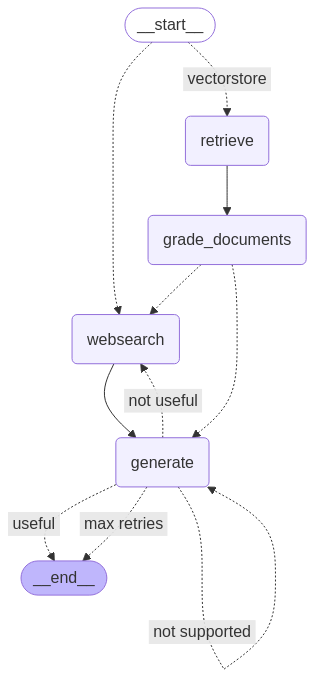

In [32]:
from langgraph.graph import StateGraph
from IPython.display import Image, display

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("websearch", web_search)  # web search
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generate

# Build graph
workflow.set_conditional_entry_point(
    route_question,
    {
        "websearch": "websearch",
        "vectorstore": "retrieve",
    },
)
workflow.add_edge("websearch", "generate")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "websearch": "websearch",
        "generate": "generate",
    },
)
workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported": "generate",
        "useful": END,
        "not useful": "websearch",
        "max retries": END,
    },
)

# Compile
graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [47]:
import json

def run_question(question: str, max_retries: int = 3) -> dict:
    inputs = {"question": question, "max_retries": max_retries}
    final_answer = None

    # Stream until the final generation is produced
    for event in graph.stream(inputs, stream_mode="values"):
        if "generation" in event:
            final_answer = event["generation"].content.strip()

    return {"question": question, "answer": final_answer or ""}

# List of Star Wars questions
questions = [
    "Can you list all the main characters in Star Wars?",
    "Who are the primary villains in the Star Wars saga?",
    "Which Star Wars films feature Luke Skywalker?"
]

# Execute and collect structured results
results = [run_question(q) for q in questions]
print(json.dumps(results, indent=2))


---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---


Embedding texts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95inputs/s]


---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: NOT ALL DOCUMENTS ARE RELEVANT TO QUESTION, INCLUDE WEB SEARCH---
---WEB SEARCH---
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---
---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---


Embedding texts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.21inputs/s]


---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: NOT ALL DOCUMENTS ARE RELEVANT TO QUESTION, INCLUDE WEB SEARCH---
---WEB SEARCH---
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---
---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---


Embedding texts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.57inputs/s]


---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: MAX RETRIES REACHED---
[
  {
    "question": "Can you list all the main characters in Star Wars?",
    "answer": "Based on the provided context, here are the main characters mentioned:\n\n1. Luke\n2. Leia\n3. Han\n4. Chewbacca\n5. R2-D2\n6. C-3PO\n7. Darth Vader\n\nThese characters are explicitly mentioned in the context as part of the original trilogy's main cast."
  },
  {
    "question": "Who are the primary villains in the Star Wars saga?",
    "answer": "Based on the provided context, the primary vill